<a href="https://colab.research.google.com/github/kashyapsanket/CNN-Layer-Visualization/blob/master/CNN_Feature_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tarfile
tar = tarfile.open("gdrive/My Drive/EnglishImg.tgz", "r:gz")
tar.extractall()

Extracting dataset and loading into a format usable for CNNs.

In [0]:
import os
import glob
import cv2 
from sklearn.model_selection import train_test_split
import numpy as np

In [0]:
dir = 'English/Img'

In [0]:
dataset = {}

for name in glob.iglob('English/Img/*/Bmp/*'):
    key = int(name[-2:])
    if key not in dataset.keys():
        dataset[key] = []
    for f in glob.iglob(name + '/*.png'):
        dataset[key].append(f)

Performing Sanity Check

In [0]:
for key, value in dataset.items():
    print(key)
    print("Length of the values = ", len(value))
    print("*"*20)
    for item in value:
        print(item)

46
Length of the values =  39
********************
English/Img/BadImag/Bmp/Sample046/img046-00003.png
English/Img/BadImag/Bmp/Sample046/img046-00005.png
English/Img/BadImag/Bmp/Sample046/img046-00006.png
English/Img/BadImag/Bmp/Sample046/img046-00002.png
English/Img/BadImag/Bmp/Sample046/img046-00001.png
English/Img/BadImag/Bmp/Sample046/img046-00004.png
English/Img/GoodImg/Bmp/Sample046/img046-00003.png
English/Img/GoodImg/Bmp/Sample046/img046-00025.png
English/Img/GoodImg/Bmp/Sample046/img046-00010.png
English/Img/GoodImg/Bmp/Sample046/img046-00015.png
English/Img/GoodImg/Bmp/Sample046/img046-00009.png
English/Img/GoodImg/Bmp/Sample046/img046-00019.png
English/Img/GoodImg/Bmp/Sample046/img046-00014.png
English/Img/GoodImg/Bmp/Sample046/img046-00029.png
English/Img/GoodImg/Bmp/Sample046/img046-00033.png
English/Img/GoodImg/Bmp/Sample046/img046-00021.png
English/Img/GoodImg/Bmp/Sample046/img046-00005.png
English/Img/GoodImg/Bmp/Sample046/img046-00031.png
English/Img/GoodImg/Bmp/Sample0

In [0]:
X_train = [] #Primary Dataset
Y_train = [] #Labels
X_test = []
Y_test = []

In [0]:
for key, value in dataset.items():
    temp_X = []
    temp_Y = []
    for item in value:
        img = cv2.imread(item, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (64, 64))
        img = np.reshape(img, (64,64,1))
        real_label = key
        temp_X.append(img)
        temp_Y.append(real_label)
        xTrain, xTest, yTrain, yTest = train_test_split(temp_X, temp_Y, test_size = 0.2)
    X_train += xTrain
    X_test += xTest
    Y_train += yTrain
    Y_test += yTest

In [0]:
print(len(X_train), len(Y_train))
print(len(X_test), len(Y_test))

9975 9975
2528 2528


In [0]:
print(X_train[900])

[[[76]
  [78]
  [81]
  ...
  [76]
  [77]
  [78]]

 [[76]
  [79]
  [82]
  ...
  [78]
  [79]
  [79]]

 [[74]
  [77]
  [79]
  ...
  [81]
  [81]
  [81]]

 ...

 [[88]
  [86]
  [85]
  ...
  [79]
  [76]
  [74]]

 [[88]
  [86]
  [84]
  ...
  [76]
  [74]
  [73]]

 [[86]
  [84]
  [83]
  ...
  [72]
  [72]
  [72]]]


In [0]:
import sklearn.preprocessing
label_binarizer = sklearn.preprocessing.LabelBinarizer()
label_binarizer.fit(range(max(Y_train)))
Y_test = label_binarizer.transform(Y_test)
Y_train = label_binarizer.transform(Y_train)

In [0]:
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers.advanced_activations import LeakyReLU, PReLU
from keras.utils import np_utils, generic_utils
from keras.optimizers import SGD

Using TensorFlow backend.


In [0]:
X_train = np.array(X_train) #Primary Dataset
Y_train = np.array(Y_train) #Labels
X_test = np.array(X_test)
Y_test = np.array(Y_test)

In [0]:
from keras.callbacks import ModelCheckpoint
#from keras.models import load_weights
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64,64,1),kernel_initializer='random_uniform'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding = 'same'))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(62, activation='softmax'))

#model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

#model.fit(X_train, Y_train, epochs=100,batch_size=256, validation_data = (X_test,Y_test), callbacks=callbacks_list)
#score = model.evaluate(X_test, Y_test, batch_size=128)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
model.load_weights('weights.hdf5') 

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

In [0]:
Y_pred = model.predict(X_test)

NameError: ignored

In [0]:
score = model.evaluate(X_test, Y_test, batch_size=128)
print(score)

2528/2528 [==============================] - 0s 186us/step
[0.24013615262847912, 0.9260284802581691]


In [0]:
pred_labels = []
for item in Y_pred:
  maxind = -1
  maxval = -1
  for i in range(len(item)):
    if item[i] > maxval:
      maxval = item[i]
      maxind = i
  pred_labels.append(maxind)

print(len(pred_labels))  

2528


In [0]:
labels = list((np.argmax(Y_test, axis=1)).reshape(-1, 1))

print((labels))

[array([46]), array([46]), array([46]), array([46]), array([46]), array([46]), array([46]), array([46]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([23]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11]), array([11])

In [0]:
from sklearn.metrics import confusion_matrix
c_mat = confusion_matrix(labels, pred_labels)
print(c_mat)

[[ 0  0  0 ...  0  0  0]
 [ 0 19  0 ...  0  0  0]
 [ 0  0 23 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  6  0]
 [ 0  0  0 ...  0  0 15]]


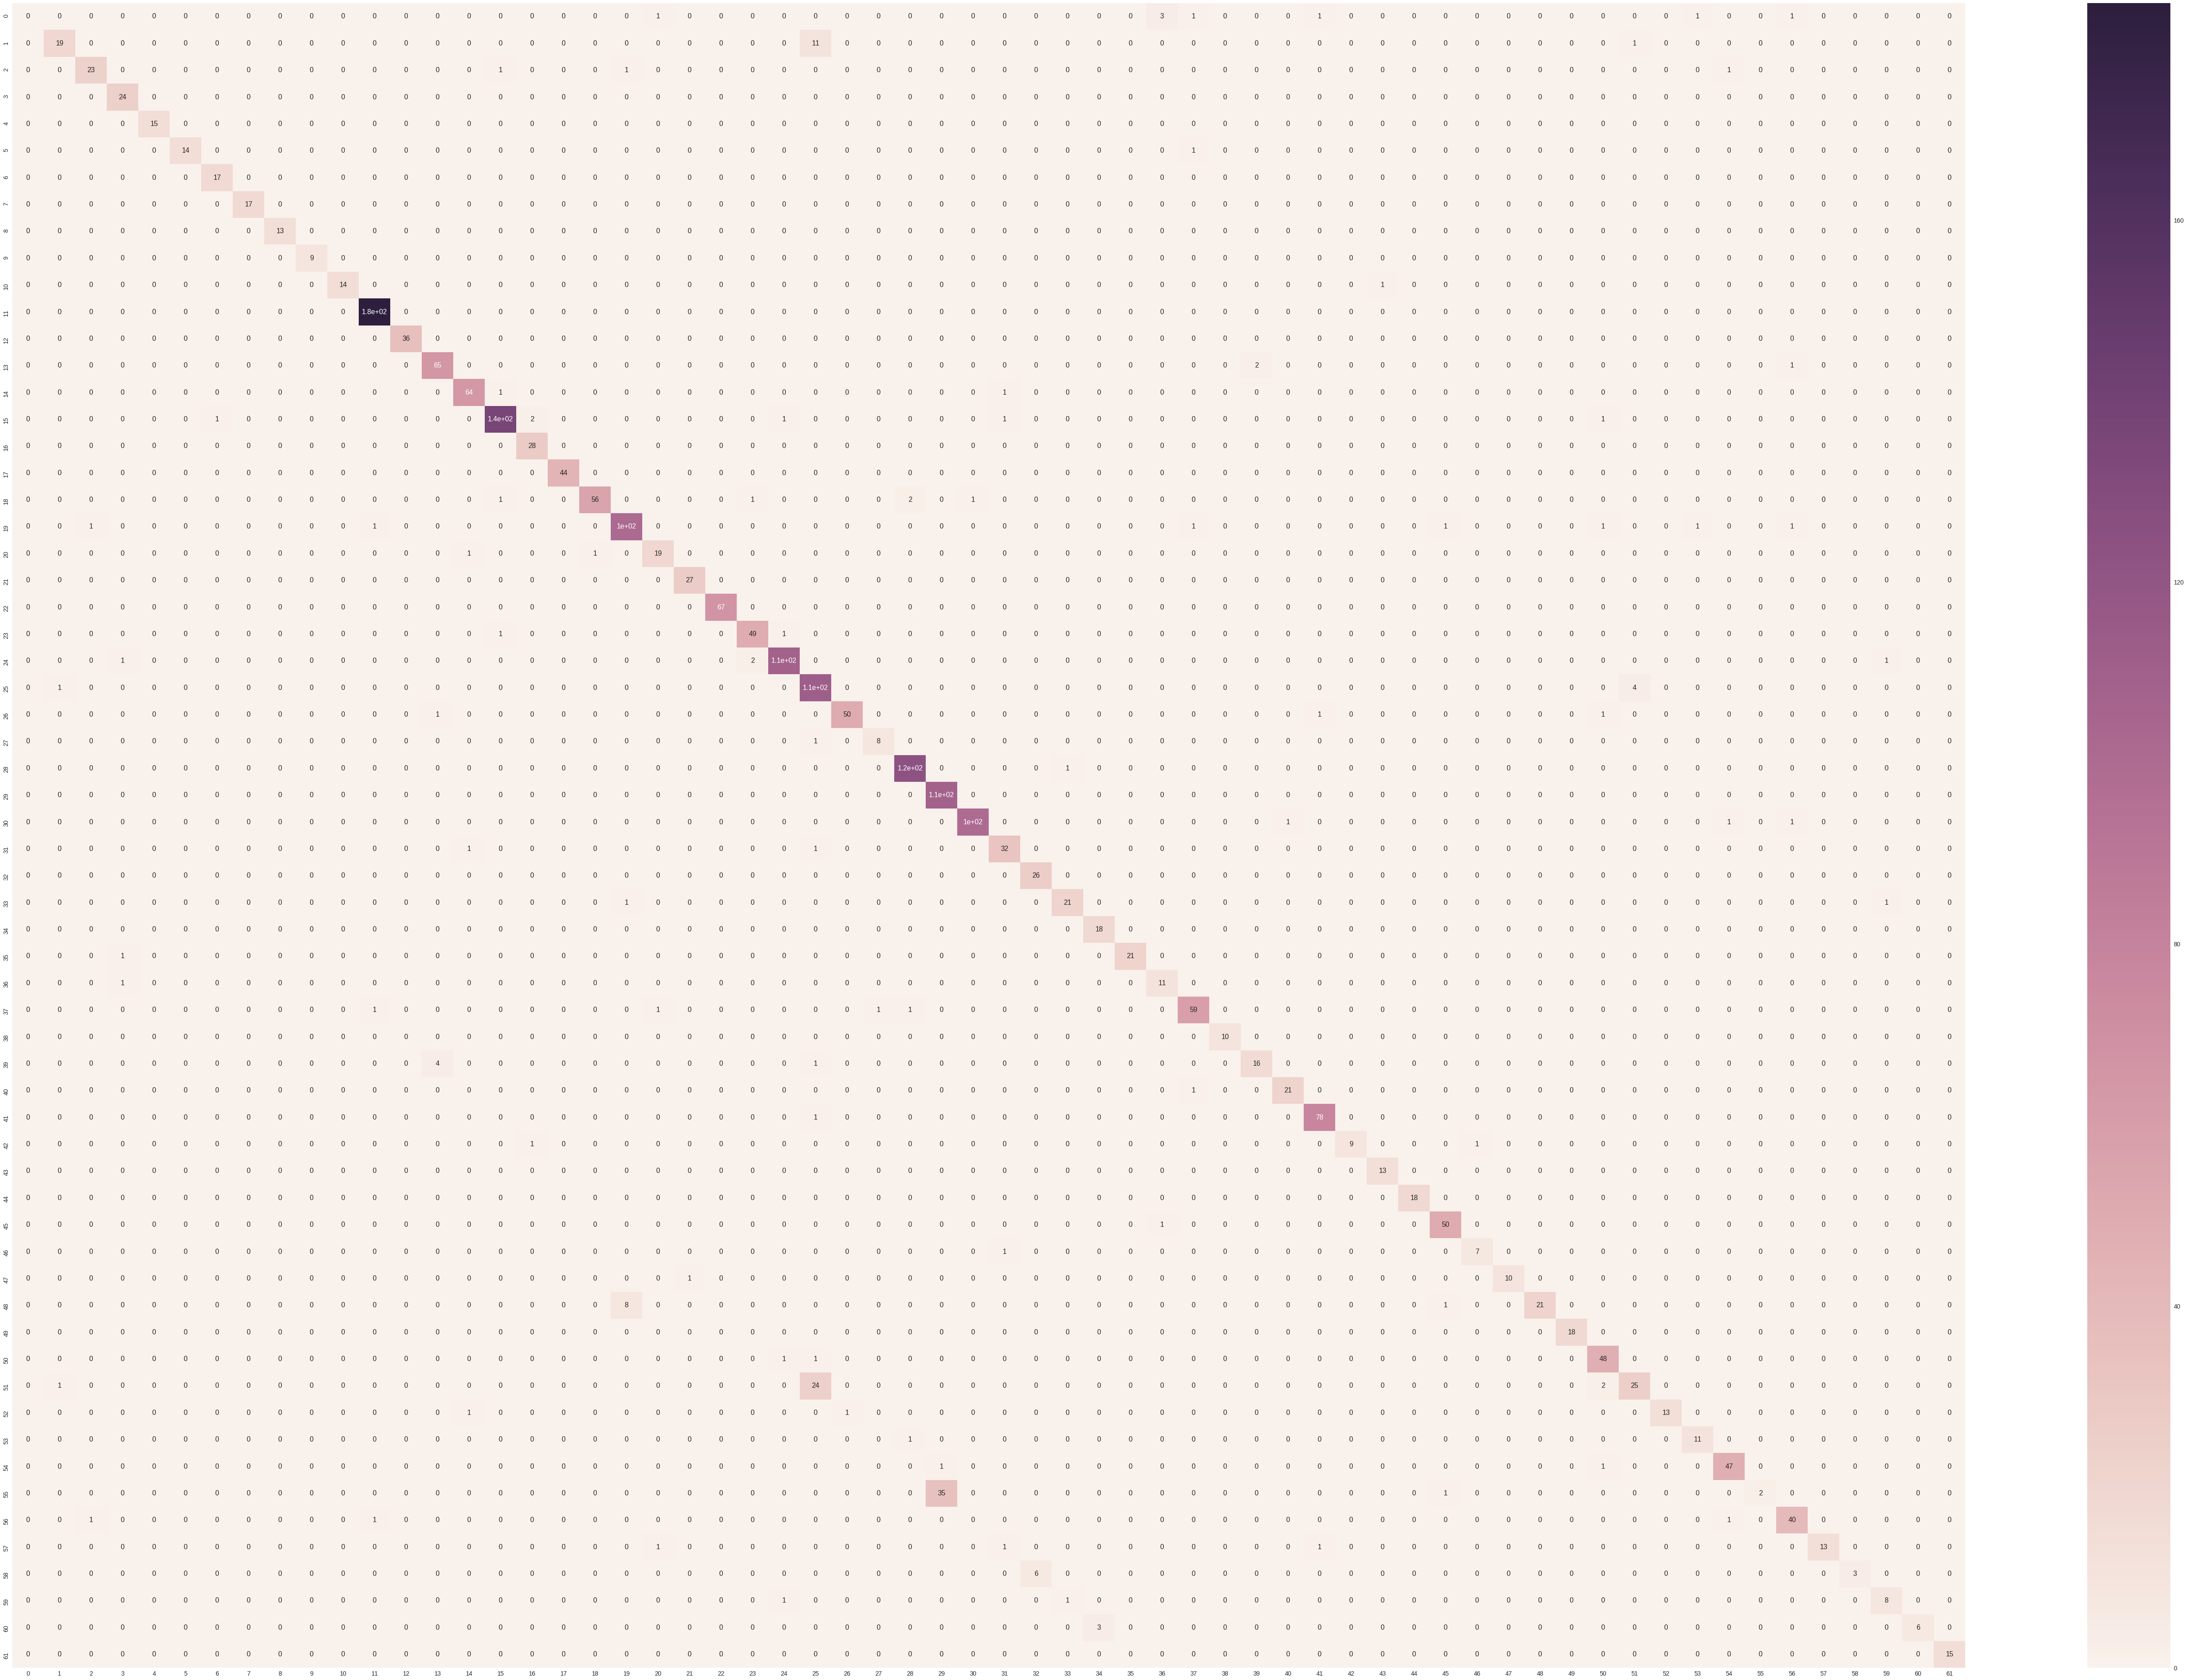

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

      
df_cm = pd.DataFrame(c_mat, range(62),
                  range(62))
plt.figure(figsize = (100,70))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [0]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 62, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 11, 11, 128)       73856     
__________

In [0]:
from keras import models
layer_outputs = [layer.output for layer in model.layers[:]] 
# Extracts the outputs of the top 12 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [0]:
img = cv2.imread('img017-00001.png', cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (64, 64))


In [0]:
import matplotlib.pyplot as plt

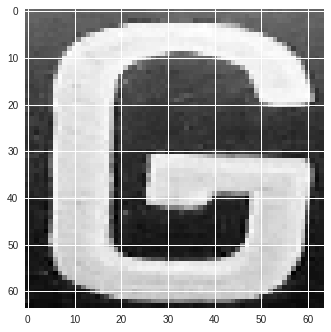

In [0]:
imgplot = plt.imshow(img)

In [0]:
img = np.reshape(img, (64,64,1))
tester = []
tester.append(img)
tester = np.array(tester)
print(tester)

[[[[118]
   [116]
   [117]
   ...
   [118]
   [118]
   [118]]

  [[118]
   [118]
   [118]
   ...
   [119]
   [118]
   [117]]

  [[118]
   [118]
   [117]
   ...
   [118]
   [119]
   [120]]

  ...

  [[141]
   [143]
   [144]
   ...
   [146]
   [146]
   [146]]

  [[138]
   [147]
   [146]
   ...
   [144]
   [145]
   [146]]

  [[147]
   [148]
   [146]
   ...
   [145]
   [144]
   [145]]]]


In [0]:
activations = activation_model.predict(tester) 
print(len(activations))
# Returns a list of five Numpy arrays: one array per layer activation

16


In [0]:
first_layer_activation = activations[0]
print(first_layer_activation.shape)

(1, 62, 62, 32)


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


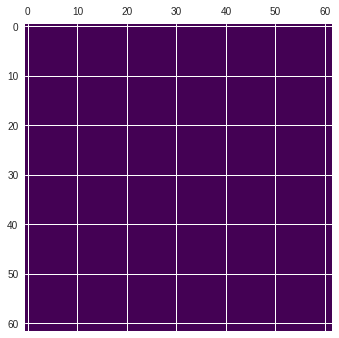

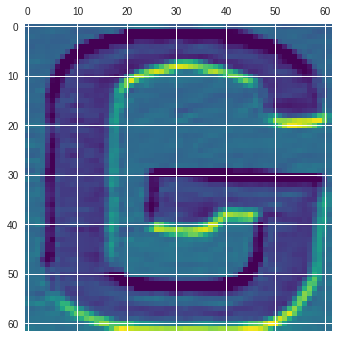

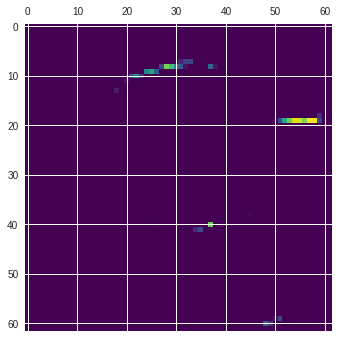

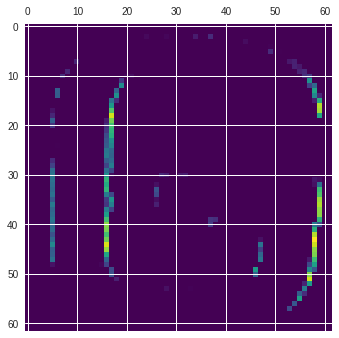

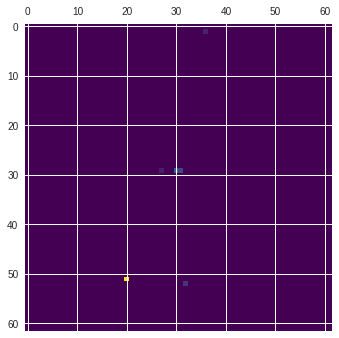

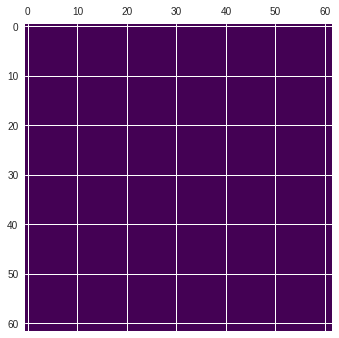

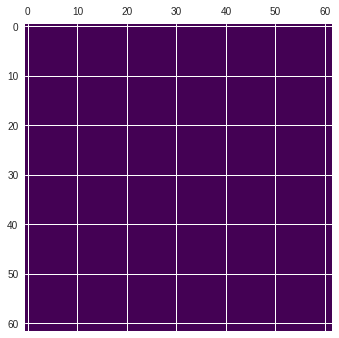

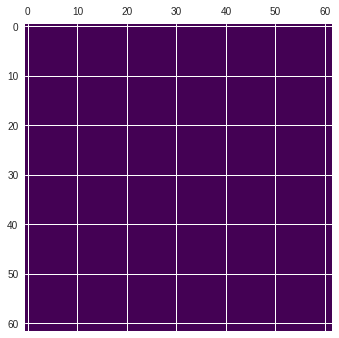

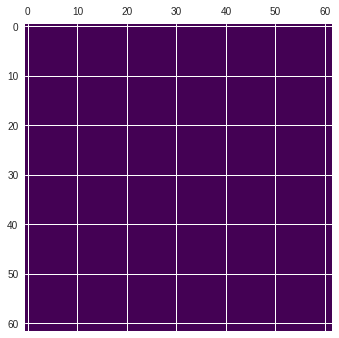

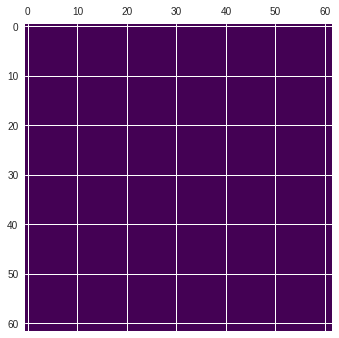

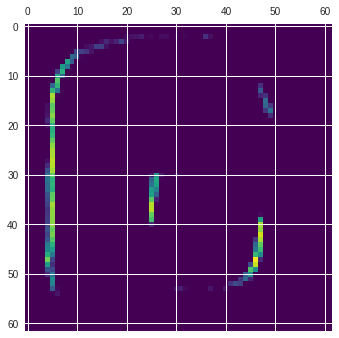

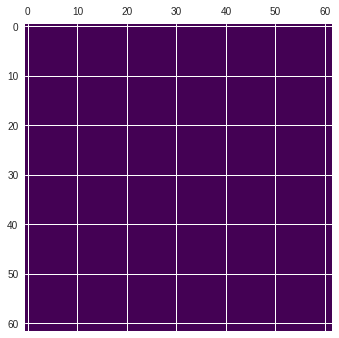

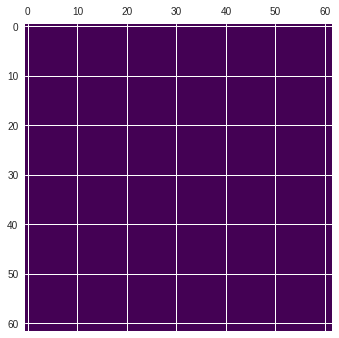

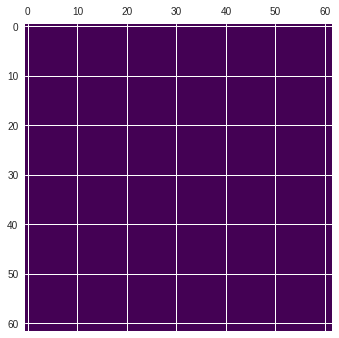

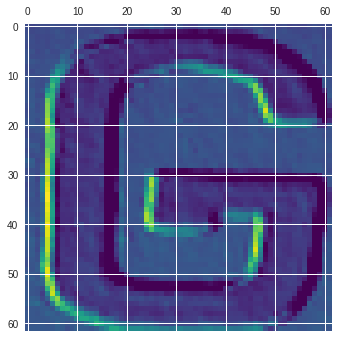

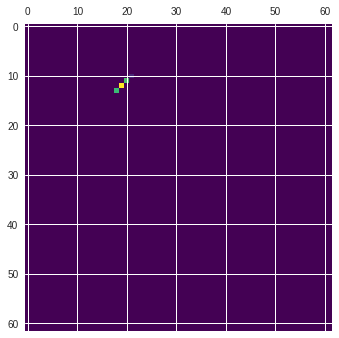

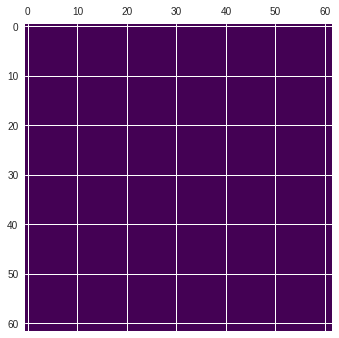

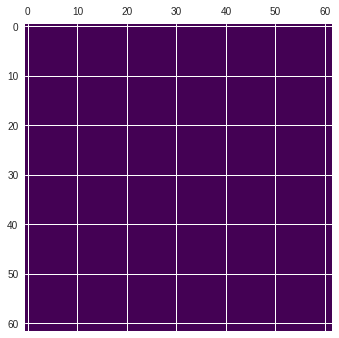

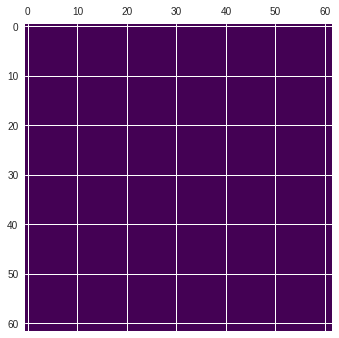

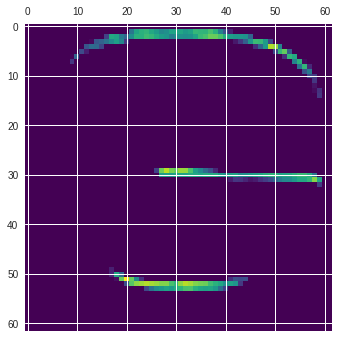

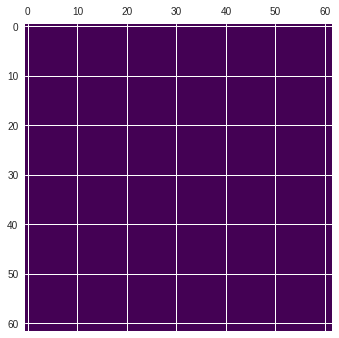

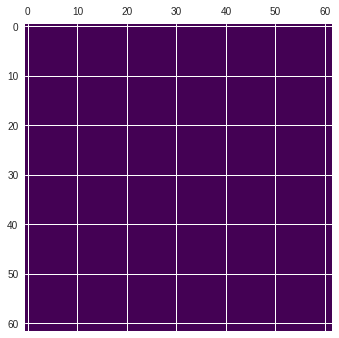

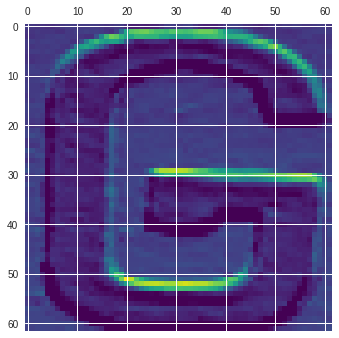

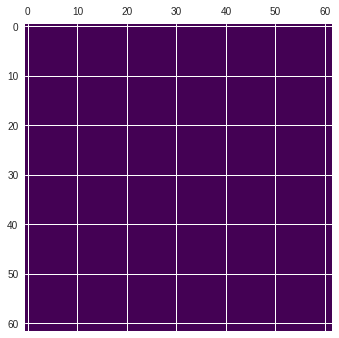

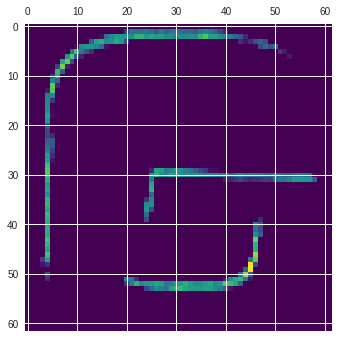

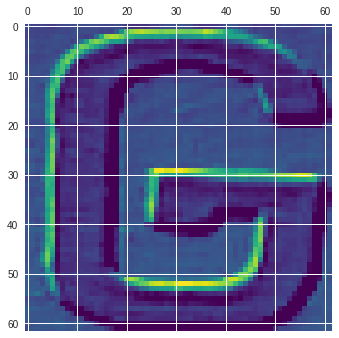

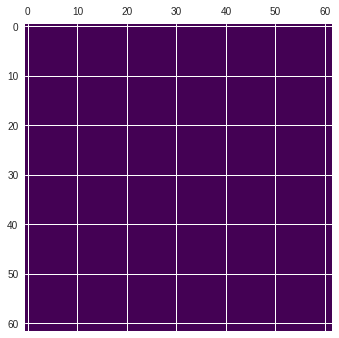

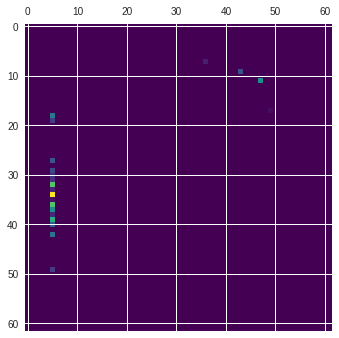

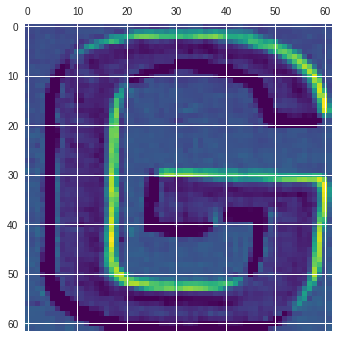

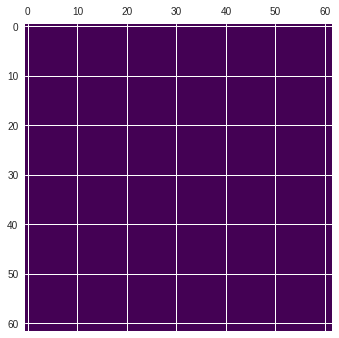

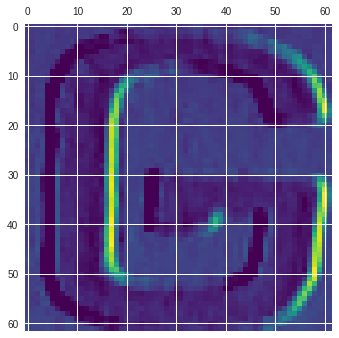

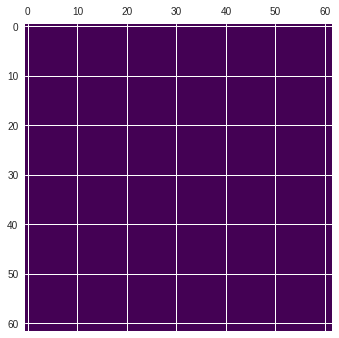

In [0]:
for i in range(32):
  plt.matshow(first_layer_activation[0, :, :, i], cmap='viridis')

In [0]:
layer_names = []
for layer in model.layers[:9]:
    layer_names.append(layer.name) # Names of the layers, so you can have them as part of your plot
    
images_per_row = 16
print((layer_names))

['conv2d_1', 'conv2d_2', 'max_pooling2d_1', 'conv2d_3', 'conv2d_4', 'max_pooling2d_2', 'conv2d_5', 'conv2d_6', 'max_pooling2d_3']


Features  32
2
62 SIZE
Features  32
2
60 SIZE
Features  32
2
30 SIZE
Features  64
4
28 SIZE
Features  64
4
26 SIZE
Features  64
4
13 SIZE
Features  128
8
11 SIZE
Features  128
8
9 SIZE
Features  128
8
5 SIZE


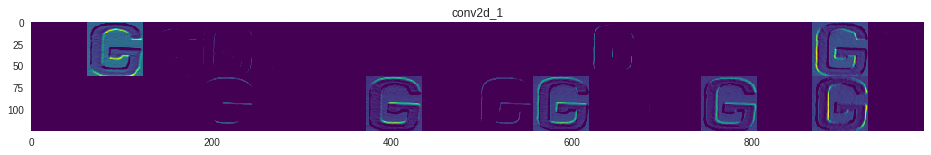

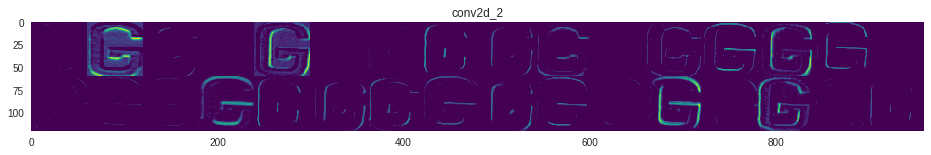

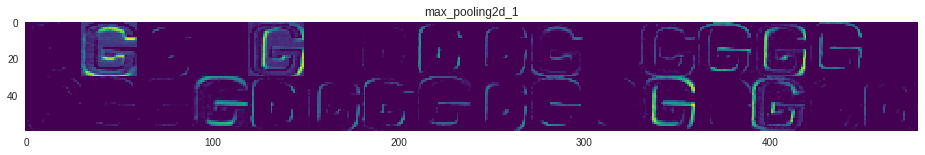

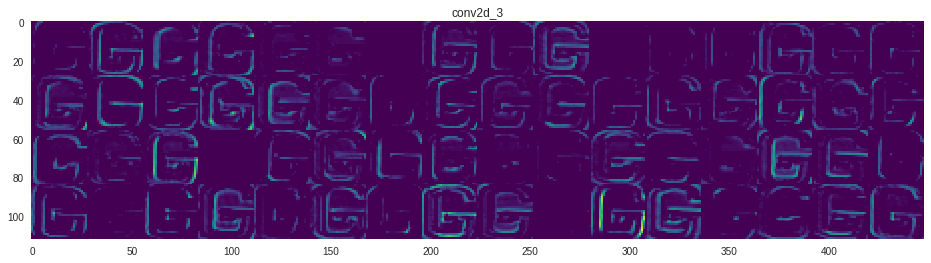

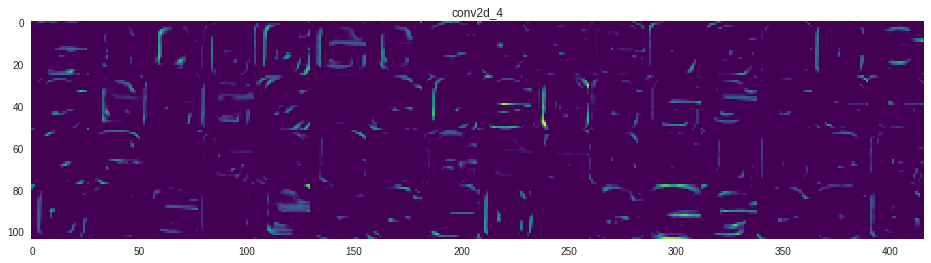

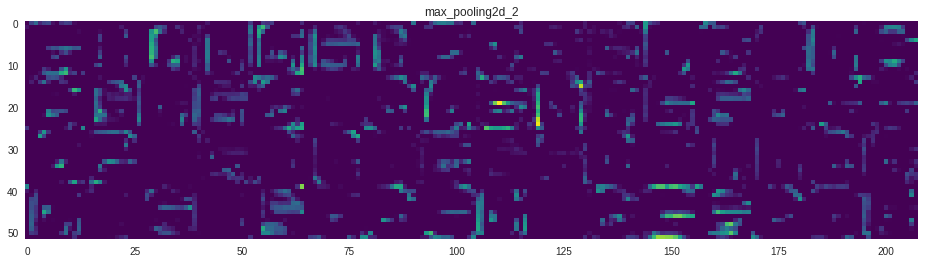

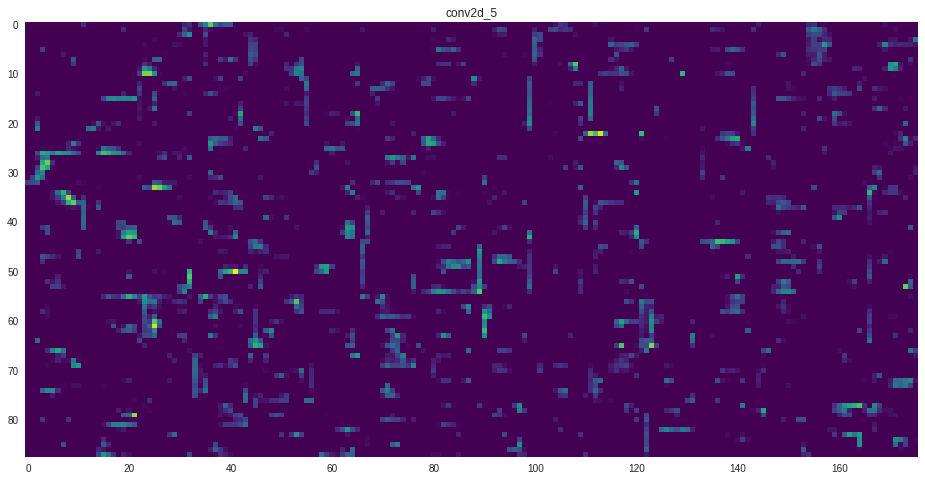

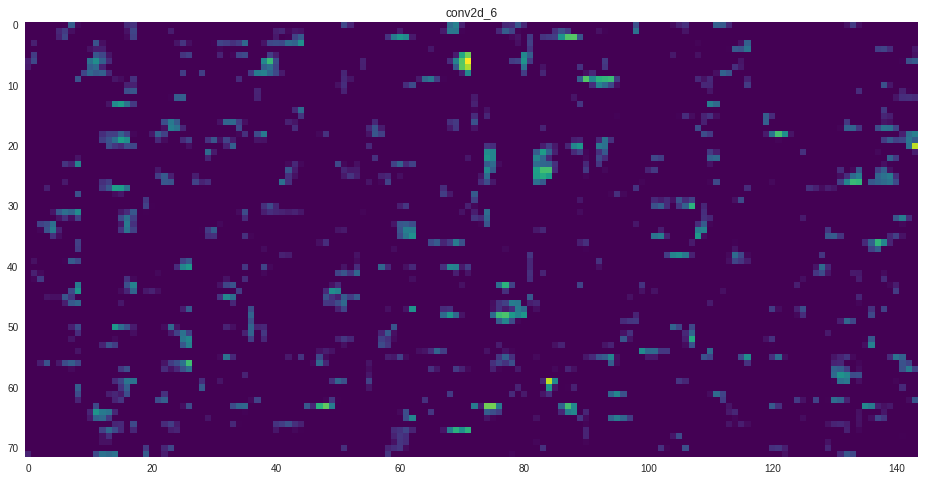

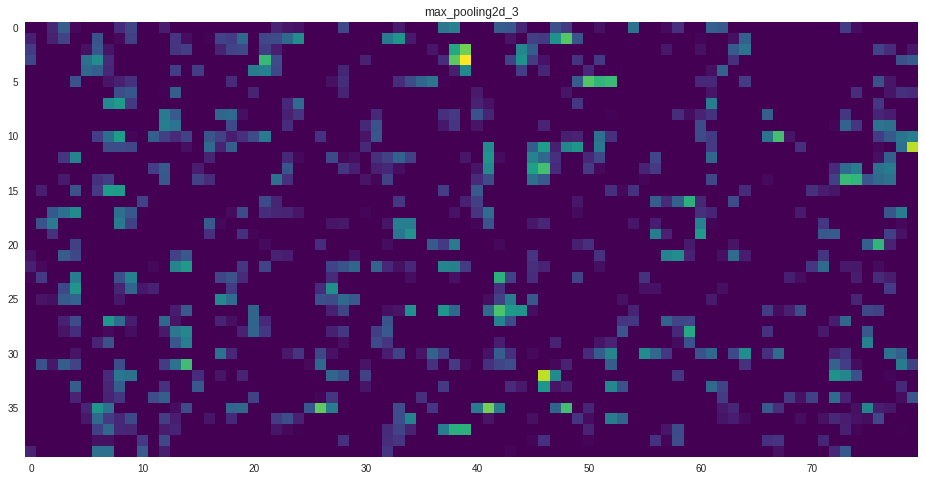

In [0]:
for layer_name, layer_activation in zip(layer_names, activations): # Displays the feature maps
    n_features = layer_activation.shape[-1] # Number of features in the feature map
    print("Features ",n_features)
    size = layer_activation.shape[1] 
    n_cols = int(n_features / images_per_row) 
    print(n_cols)
    display_grid = np.zeros((size * n_cols, images_per_row * size))
    for col in range(n_cols): # Tiles each filter into a big horizontal grid
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            #channel_image -= channel_image.mean() # Post-processes the feature to make it visually palatable
            #channel_image /= channel_image.std()
            #channel_image *= 64
            #channel_image += 128
            #channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size, # Displays the grid
                         row * size : (row + 1) * size] = channel_image
    print(size, "SIZE")
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')